**Homework 8 Template**

Make a copy of this and save as "hw8_name.ipynb"

Name: Jamison Wolsborn

Comments for instructor:


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from vpython import *
from scipy.constants import gravitational_constant
from datetime import datetime

**Exercise 8.5**

A pendulum like the one in Exercise 8.4 can be driven by, for example, exerting a small oscillating force horizontally on the mass.  Then the equation of motion for the pendulum becomes

\begin{equation*}
{d^2\theta\over d t^2} = - {g\over\ell}\sin\theta
  + C \cos\theta \sin\Omega t,
\end{equation*}

where $C$ and $\Omega$ are constants.

**a)** 
Write a program to solve this equation for $\theta$ as a function of time with $\ell=10\,$cm, $C=2\,\mathrm{s}^{-2}$ and $\Omega=5\,\mathrm{s}^{-1}$ and make a plot of $\theta$ as a function of time from $t=0$ to $t=100\,$s.  Start the pendulum at rest with $\theta=0$ and $d\theta/ d t=0$.

Text(0.5, 0, 't')

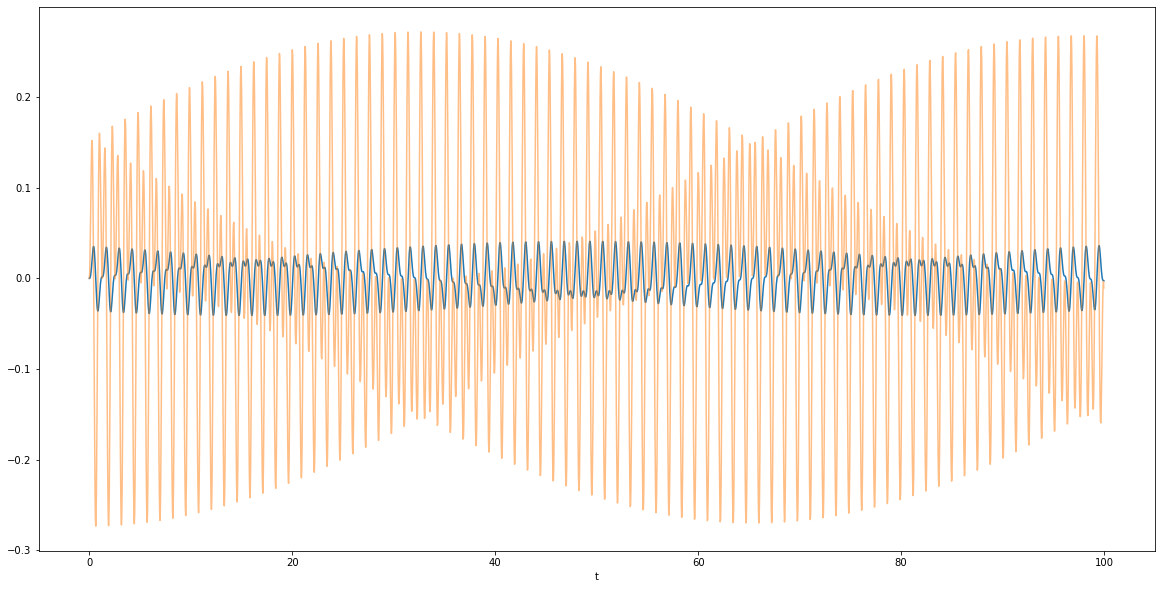

In [3]:
l = .10 #cm
C = 2 #s^-2
Omega = 5 #s^-1
g = 9.81

def f(r,t):
    theta = r[0]
    omega = r[1]
    ftheta = omega
    fomega = -g/l*np.sin(theta) + C*np.cos(theta)*np.sin(Omega*t)
    return np.array([ftheta, fomega], float)

a = 0.0
b = 100.0
N = 3000
h = (b-a)/N

tpoints = np.arange(a,b,h)
xpoints = []
ypoints = []

r = np.array([0,0],float)
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6
plt.figure(figsize = (20,10))
plt.plot(tpoints,xpoints,alpha = 1)
plt.plot(tpoints,ypoints, alpha = .5)
plt.xlabel("t")

**Pts /10**

**b)** 
Now change the value of $\Omega$, while keeping $C$ the same, to find a value for which the pendulum resonates with the driving force and swings widely from side to side.  Make a plot for this case also.

Text(0.5, 0, 't')

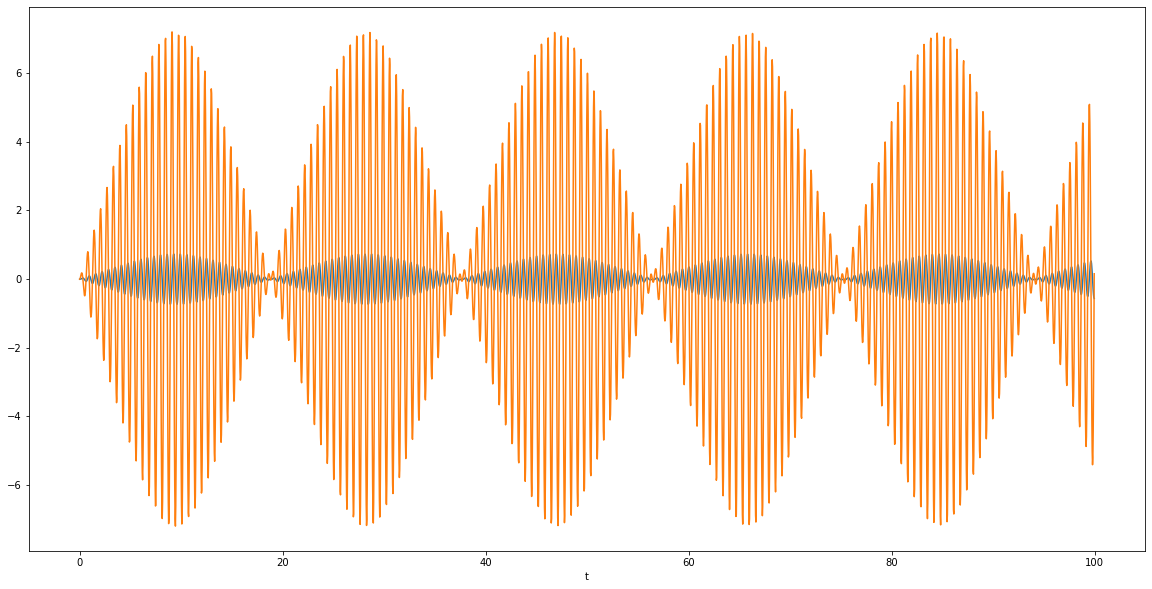

In [4]:
l = .10 #cm
C = 2 #s^-2
Omega = 10 #s^-1
g = 9.81

def f(r,t):
    theta = r[0]
    omega = r[1]
    ftheta = omega
    fomega = -g/l*np.sin(theta) + C*np.cos(theta)*np.sin(Omega*t)
    return np.array([ftheta, fomega], float)

a = 0.0
b = 100.0
N = 3000
h = (b-a)/N

tpoints = np.arange(a,b,h)
xpoints = []
ypoints = []

r = np.array([0,0],float)
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6
plt.figure(figsize=(20,10))
plt.plot(tpoints,xpoints)
plt.plot(tpoints,ypoints)
plt.xlabel("t")

**Pts /5**

**c)** Create two animations of the motion of the pendulum using the vpython module, one when the driving frequency is far from resonance as in part a, and one when it is near resonance as in part b. Show the movement of both the pendulum arm and bob. You may either add this code to the end of your code in parts a and b, or below.

In [49]:
canvas()

# position of pendulum pivot
xp = 0
yp = 0

# initial position of arm end and bob
theta0 = r[0]
xbob = xp + l*sin(theta0)
ybob = yp - l*cos(theta0)

arm = cylinder(pos=vector(xp,yp,0), axis=vector(xbob,ybob,0), radius=.001, color=color.blue)
bob = sphere(pos=vector(xbob,ybob,0), radius=0.01, color=color.red)

for theta in ypoints:
    rate(10)
    xbob = xp + l*sin(theta)
    ybob = yp - l*cos(theta)
    arm.axis = vector(xbob,ybob,0)
    bob.pos = vector(xbob,ybob,0)

#I can't get this to work for the life of me

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

**Pts /5**

**Total Exercise Pts /20**

**Exercise 8.8**

A heavy steel rod and a spherical ball-bearing, discarded by a passing spaceship, are floating in zero gravity and the ball bearing is orbiting around the rod under the effect of its gravitational pull (check your textbook for a figure illustrating the relationship).

For simplicity we'll assume that the rod is of negligible cross-section and heavy enough that it doesn't move significantly, and that the ball bearing is orbiting around the rod's mid-point in a plane perpendicular to the rod.

**a)**
Treating the rod as a line of mass $M$ and length $L$ and the ball bearing as a point mass $m$, show that the attractive force $F$ felt by the ball bearing in the direction toward the center of the rod is given by

\begin{equation*}
F = {GMm\over L} \sqrt{x^2+y^2}
    \int_{-L/2}^{L/2} {d z\over(x^2+y^2+z^2)^{3/2}}\,,
\end{equation*}

where $G$ is Newton's gravitational constant and $x$ and $y$ are the
coordinates of the ball bearing in the plane perpendicular to the rod.  The
integral can be done in closed form and gives

\begin{equation*}
F = {GMm\over\sqrt{(x^2+y^2)(x^2+y^2+L^2/4)}}.
\end{equation*}

Hence show that the equations of motion for the position $x,y$ of the ball
bearing in the $xy$-plane are

\begin{equation*}
{d^2 x\over d t^2} = - GM {x\over r^2\sqrt{r^2+L^2/4}},\qquad
{d^2 y\over d t^2} = - GM {y\over r^2\sqrt{r^2+L^2/4}},
\end{equation*}

where $r=\sqrt{x^2+y^2}$.

# $F = ma $

# $\hat r = x \hat{x} + y\hat{y} + z\hat{z} $

# $a = \frac{d^2}{dt^2} \hat{r}$

# $ m \frac{d^2}{dt^2} \hat{r} = -\frac{GMm}{r^2\sqrt{r^2+L^2/4}}$

# $\frac{d^2}{dt^2} \hat{r} = -\frac{GM}{r^2\sqrt{r^2+L^2/4}}$

\begin{equation*}
{d^2 x\over d t^2} = - GM {x\over r^2\sqrt{r^2+L^2/4}},\qquad
{d^2 y\over d t^2} = - GM {y\over r^2\sqrt{r^2+L^2/4}},
\end{equation*}

Kinda lost it on the last step

**Pts /5**

**b)** 
Convert these two second-order equations into four first-order ones using the techniques of Section 8.3.  Then, working in units where $G=1$, write a program to solve them for $M=10$, $L=2$, and initial conditions $(x,y)=(1,0)$ with velocity of $+1$ in the $y$ direction.  Calculate the orbit from $t=0$ to $t=10$ and make a plot of it, meaning a plot of $y$ against $x$.  You should find that the ball bearing does not orbit in a circle or ellipse as a planet does, but has a precessing orbit, which arises because the attractive force is not a simple $1/r^2$ force as it is for a planet orbiting the Sun.

Text(0, 0.5, 'y')

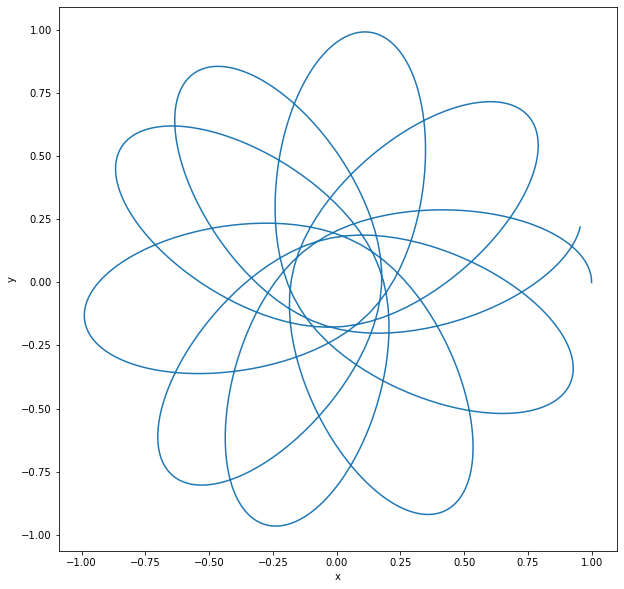

In [53]:
G = 1.0
M = 10.0
L = 2.0
x0, y0 = 1.0,0.0
velx0, vely0 = 0.0,1.0
a = 0.0
b = 10.0
N = 1000.0
h = (b-a)/N

def f(r,t):
    x = r[0]
    velx = r[1]
    y = r[2]
    vely = r[3]
    rad = np.sqrt(x**2 + y**2)
    fx = velx
    fy = vely
    fvelx = -G*M*x/(rad**2*np.sqrt(rad**2+L**2/4))
    fvely = -G*M*y/(rad**2*np.sqrt(rad**2+L**2/4))
    return np.array([fx, fvelx, fy, fvely])

tpoints = np.arange(a,b,h)
xpoints = []
ypoints = []
r = np.array([x0, velx0, y0, vely0])

for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[2])
    k1 = h * f(r, t)
    k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
    k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
    k4 = h * f(r + k3, t + h)
    r += (k1 + 2 * k2 + 2 * k3 + k4) / 6

plt.figure(figsize=(10,10))
plt.plot(xpoints, ypoints)
plt.xlabel('x')
plt.ylabel('y')

**Pts /10**

**Extra Credit** Create an animation of the ball orbiting the rod. Your animation should show the ball in the plane perpendicular to the rod. You may also wish to include a cross section of the rod at the center of your animation.

In [5]:
#Type your code here

**XC Pts /5**

**Total Exercise Pts /15**

**Exercise 8.10**

Many comets travel in highly elongated orbits around the Sun.  For much of their lives they are far out in the solar system, moving very slowly, but on rare occasions their orbit brings them close to the Sun for a fly-by and for a brief period of time they move very fast indeed (check your textbook for a diagram).

This is a classic example of a system for which an adaptive step size method is useful, because for the large periods of time when the comet is moving slowly we can use long time-steps, so that the program runs quickly, but short time-steps are crucial in the brief but fast-moving period close to the Sun.

The differential equation obeyed by a comet is straightforward to derive.  The force between the Sun, with mass $M$ at the origin, and a comet of mass $m$ with position vector $\vec{r}$ is $GMm/r^2$ in direction $-\vec{r}/r$ (i.e., the direction towards the Sun), and hence Newton's second law tells us that

\begin{equation*}
m {d^2\vec{r}\over d t^2} = -\biggl({GMm\over r^2}\biggr)\,{\vec{r}\over r}.
\end{equation*}

Canceling the $m$ and taking the $x$ component we have

\begin{equation*}
{d^2 x\over d t^2} = -GM {x\over r^3}\,,
\end{equation*}

and similarly for the other two coordinates.  We can, however, throw out one of the coordinates because the comet stays in a single plane as it orbits.  If we orient our axes so that this plane is perpendicular to the $z$-axis, we can forget about the $z$ coordinate and we are left with just two second-order equations to solve:

\begin{equation*}
{d^2 x\over d t^2} = -GM {x\over r^3}\,, \qquad
{d^2 y\over d t^2} = -GM {y\over r^3}\,,
\end{equation*}

where $r=\sqrt{x^2+y^2}$.

**a)** 
Turn these two second-order equations into four first-order equations, using the methods you have learned.

$$ \frac{dx}{dt} = v $$ 

$$ \frac{dy}{dt} = w $$

$$ \frac{dv}{dt} = -GM\frac{x}{r^3} $$

$$ \frac{dw}{dt} = -GM\frac{y}{r^3} $$

**Pts /5**

**b)** 
Write a program to solve your equations using the fourth-order Runge--Kutta method with a _fixed_ step size.  You will need to look up the mass of the Sun and Newton's gravitational constant $G$.  As an initial condition, take a comet at coordinates $x=4$ billion kilometers and $y=0$ (which is somewhere out around the orbit of Neptune) with initial velocity $v_x=0$ and $v_y = 500\,\mathrm{m\,s}^{-1}$.  Make a graph showing the trajectory of the comet (i.e., a plot of $y$ against $x$).

Choose a fixed step size $h$ that allows you to accurately calculate at least two full orbits of the comet.  Since orbits are periodic, a good indicator of an accurate calculation is that successive orbits of the comet lie on top of one another on your plot.  If they do not then you need a smaller value of $h$. Give a short description of your findings. What value of $h$ did you use?  What did you observe in your simulation? How long did the calculation take?

15778.8
0:00:06.692234


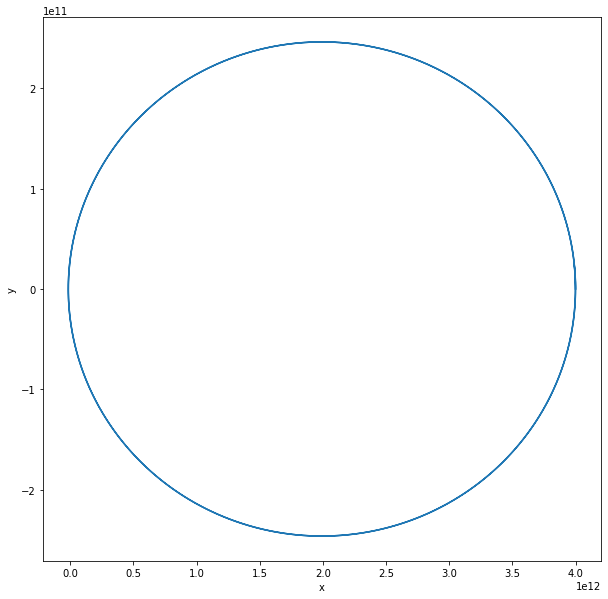

In [131]:
begin_time = datetime.now()
sun_mass = 1.989e30 #in kg
G = gravitational_constant #m^3 kg^-1 s^-2
x0, y0 = 4.0e12,0.0 #4 billion km in m
velx0,vely0 = 0.0,500 #m/s

a = 0.0
b = 60*60*24*365.25*100 #100 years from seconds
N = 200000.0
h = (b-a)/N

def f(r,t):
    x = r[0]
    velx = r[1]
    y = r[2]
    vely = r[3]
    rad = np.sqrt(x**2 + y**2)
    fx = velx
    fvelx = -G*sun_mass*x/rad**3
    fy = vely
    fvely = -G*sun_mass*y/rad**3
    return np.array([fx,fvelx,fy,fvely],float)

tpoints = np.arange(a,b,h)
xpoints = []
ypoints = []
r = np.array([x0, velx0, y0, vely0])

for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[2])
    k1 = h * f(r, t)
    k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
    k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
    k4 = h * f(r + k3, t + h)
    r += (k1 + 2 * k2 + 2 * k3 + k4) / 6

plt.figure(figsize=(10,10))
plt.plot(xpoints, ypoints)
plt.xlabel('x')
plt.ylabel('y')
print(h)
print(datetime.now() - begin_time)

I chose a period of 100 years which gives me nearly exactly 2 rotations. 
The orbit is much longer in the x direction than the y direction.
My h value was 15778.8 meters and the execution time was 6.969 seconds.

**Pts /10**

**c)**
Make a copy of your program and modify the copy to do the calculation using an adaptive step size.  Set a target accuracy of
$\delta=1$ kilometer per year in the position of the comet and again plot the trajectory.  What do you see?  How do the speed, accuracy, and step size of the calculation compare with those in part (b)?

0:00:00.086999


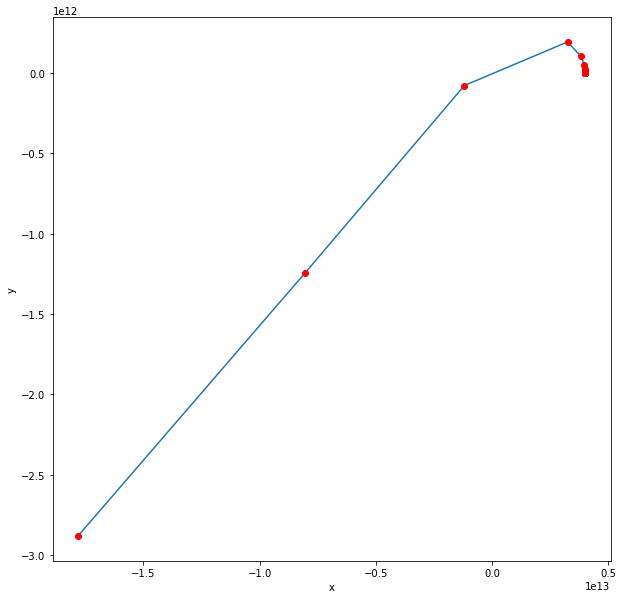

In [138]:
begin_time = datetime.now()

accuracy = 1000 #meters

sun_mass = 1.989e30 #in kg
G = gravitational_constant #m^3 kg^-1 s^-2
x0, y0 = 4.0e12,0.0 #4 billion km in m
velx0,vely0 = 0.0,500 #m/s

a = 0.0
b = 60*60*24*365.25*100 #100 years from seconds
h = 1578.0 #the size of h in previous cell

#same function as last time
def f(r,t):
    x = r[0]
    velx = r[1]
    y = r[2]
    vely = r[3]
    rad = np.sqrt(x**2 + y**2)
    fx = velx
    fvelx = -G*sun_mass*x/rad**3
    fy = vely
    fvely = -G*sun_mass*y/rad**3
    return np.array([fx,fvelx,fy,fvely],float)

#break up the runge kutta into it's own function so it can be called back
def runge_kutta(h,r,t):
    k1 = h * f(r, t)
    k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
    k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
    k4 = h * f(r + k3, t + h)
    return (k1 + 2 * k2 + 2 * k3 + k4) / 6

def stepwise(h,r,t):
    #do 2 runge kutta iterations
    x1 = runge_kutta(h,r,t)
    x2 = runge_kutta(h,r+x1,t+h)
    r1 = x1 + x2
    #do 1 more runge kutta where h is doubled
    r2 = runge_kutta(2*h,r,t)
    
    #break up x and y values
    r1x = r1[0]
    r1y = r1[2]
    r2x = r2[0]
    r2y = r2[2]
    
    #compute error
    error = np.sqrt((r1x - r2x)**2 + (r1y - r2y)**2)/30
    #figure out rho
    
    rho = h * accuracy/error
    # update h
    factor = rho**(1/4)
    
    if rho >= 1:
        t = t+2*h
        
        if factor > 2:
            h *= 2
        
        else:
            h *= factor
        
        return h,r1,t
    
    else:
        return stepwise(h*factor,r,t)
    

tpoints = []
xpoints = []
ypoints = []
r = np.array([x0, velx0, y0, vely0])

t = a #initialize t

while (t < b):
    tpoints.append(t)
    xpoints.append(r[0])
    ypoints.append(r[2])
    h,r3,t = stepwise(h,r,t)
    r += r3
    
plt.figure(figsize=(10,10))
plt.plot(xpoints,ypoints)
plt.plot(xpoints, ypoints, 'ro')
plt.xlabel('x')
plt.ylabel('y')
print(datetime.now() - begin_time)

I can't really figure out why this doesn't work. It is a lot faster though.

**Pts /10**

**d)**
Modify your program to place dots on your graph showing the position of the comet at each Runge--Kutta step around a single orbit.  You should see the steps getting closer together when the comet is close to the Sun and further apart when it is far out in the solar system.

**Pts /5**

**Total Exercise Pts /30**

**Exercise 9.1**

Write a program, or modify the one from Example 9.1, to solve Poisson's equation for the system described in Example 9.2.  Work in units where $\epsilon_0=1$ and continue the iteration until your solution for the electric potential changes by less than $10^{-6}\,$V per step at every grid point. **Use the Jacobi method.**

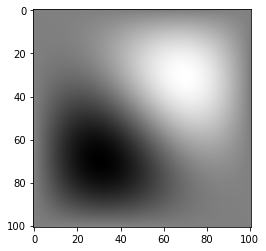

In [125]:
from numpy import empty,zeros,max
from pylab import imshow,gray,show

# Constants
M = 100         # Grid squares on a side
V = 1.0         # Voltage at top wall

target = 1e-6   # Target accuracy

# Create arrays to hold potential values
phi = zeros([M+1,M+1],float)
phi[20:41,60:81] = V
phi[60:81,20:41] = -V
phiprime = empty([M+1,M+1],float)

# Main loop
delta = 1.0
while delta>target:

    # Calculate new values of the potential
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M:
                phiprime[i,j] = phi[i,j]
            else:
                phiprime[i,j] = (phi[i+1,j] + phi[i-1,j] \
                                 + phi[i,j+1] + phi[i,j-1])/4 

    # Calculate maximum difference from old values
    delta = max(abs(phi-phiprime))

    # Swap the two arrays around
    phi,phiprime = phiprime,phi

# Make a plot
imshow(phi)
gray()
show()

**Total Exercise Pts /10**

**Exercise 9.3**

Consider the following simple model of an electronic capacitor,
consisting of two flat metal plates enclosed in a square metal box:

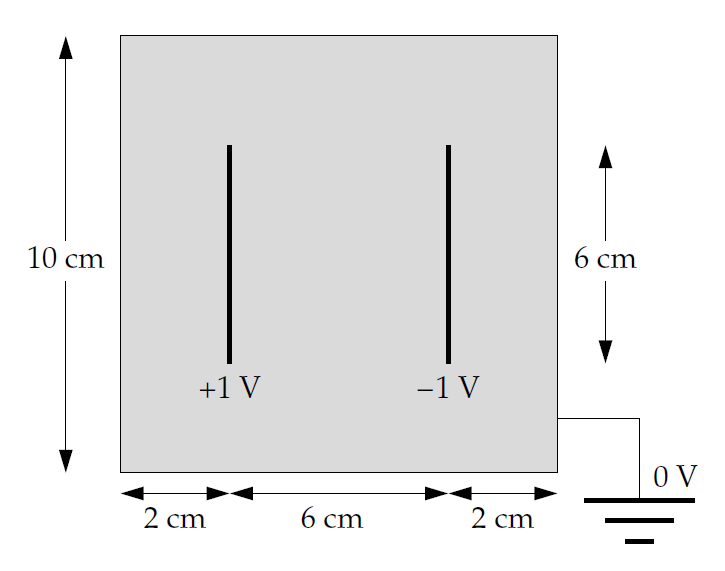

For simplicity let us model the system in two dimensions.  Using **Gauss-Seidel with overrelaxation**, write a program to calculate the electrostatic
potential in the box on a grid of $100\times100$ points, where the walls of
the box are at voltage zero and the two plates (which are of negligible
thickness) are at voltages $\pm1\,$V as shown.  Have your program calculate
the value of the potential at each grid point to a precision of
$10^{-6}\,$volts and then make a density plot of the result.

Hint: Notice that the capacitor plates are at fixed *voltage*, not
fixed charge, so this problem differs from the problem with the two charges
in Exercise 9.1.  In effect, the capacitor plates are part of the boundary
condition in this case: they behave the same way as the walls of the box,
with potentials that are fixed at a certain value and cannot change.

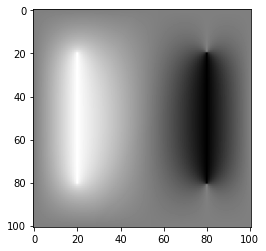

In [129]:
M = 100
V = 1
phi = zeros([M+1,M+1],float)
phi[20:81,20] = V
phi[20:81, 80] = -V

target = 1e-6

w = .9
delta = 1

while delta>target:
    delta = 0
    for i in range(M+1):
        for j in range(M+1):
            if i == 0 or j == 0 or i == M or j == M or (20 <= i <= 80 and j == 20 or j == 80):
                pass
            else:
                phi_old = phi[i,j]
                phi_new = (1+w)/4*(phi[i+1,j]+phi[i-1,j]+phi[i,j+1]+phi[i,j-1])-w*phi_old
                phi[i,j] = phi_new
                
                delta = max(abs(phi_new - phi_old))
                
plt.imshow(phi)
plt.gray()

**Total Exercise Pts /10**

**Total Pts /85**